<h1><center> Modeling Runners' Times in the Cherry Blossom Race </center></h1>
<h2><center> Web Scraping </center></h2>

<h3><center> Bin Yu, Nuoya Rezsonya, Yejur Singh Kunwar, Iram Bakhtiar</center></h3>

## Abstract

## Introduction

## Background

## Methodology

## Results

## Conclusion

# Deliverables -TO BE DELETED LATER

#### FROM 2DS POST
- Choose one of the following problems from the back of the chapter 2 : 7, 10, 11, or 17. Write a report on your analysis, including introduction, background, methods, results, and conclusions/discussions. Note that the focus of this study is getting the data into the correct format. The analysis section is going to be relatively simple from a statistical standpoint—graphics, descriptive statistics, etc., to answer the question from the problem that you chose.

## Choose one of the following problems

7. Follow the approach developed in the section called “Reading Tables of Race Results into R” to read the files for the female runners and then process them using the functions in the section called “Data Cleaning and Reformatting variables” to create a data frame for analysis. You may need to generalize the createDF() and extractVariables() functions to handle additional oddities in the raw text files.

### OR

10. We have seen that the 1999 runners were typically older than the 2012 runners. Compare the age distribution of the runners across all 14 years of the races. Use quantile-quantile plots, boxplots, and density curves to make your comparisons. How do the distributions change over the years? Was it a gradual change?

### OR

11. Normalize each male runner's time by the fastest time for the runner of the same age. To do this, find the fastest runner for each year of age from 20 to 80. The tapply() function may be helpful here. Smooth these times using loess() , and find the smoothed time using predict() . Use these smoothed times to normalize each run time. Use density plots, quantile-quantile plots, and summary statistics to compare the distribution of the age-normalized times for the runners in 1999 and 2012. What do you find? Repeat the process for the women. Compare the women in 1999 to the women in 2012 and to the men in 1999 and 2012.

### OR

17. In the section called “Scraping Race Results from the Web”, we discovered that the HTML file for the male 2000 results was so poorly formatted that htmlParse() was unable to fix it to allow us to extract the text table from the (pre) tag. In this exercise, we programmatically edit this HTML file so that we can use htmlParse() as desired. To do this, begin by reading the HTML file located at http://www.cherryblossom.org/cb003m.htm using readLines() . Carefully examine the HTML displayed in the section called “Scraping Race Results from the Web” and come up with a plan for correcting it. Consider whether you want to drop (font)s or close them properly. Once you have fixed the problem so that the (pre) tag contains the text table, pass your corrected HTML to htmlParse() . You may want to use a text connection to do this rather than writing the file to disk and reading it in.

## CODE PORTION

In [3]:
#install.packages("XML", repos="http://cran.us.r-project.org")
# install.packages('tictoc', repos='http://cran.us.r-project.org')
# install.packages('XML', dependencies=TRUE, repos='http://cran.rstudio.com/')

package 'XML' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\yubin\AppData\Local\Temp\RtmpCuoBro\downloaded_packages


In [4]:
library(XML)

Warning message:
"package 'XML' was built under R version 3.5.2"

In [6]:
menURLs = 
  c("results/1999/cb99m.html", "results/2000/cb003m.htm", "results/2001/oof_m.html",
    "results/2002/oofm.htm", "results/2003/CB03-M.HTM",
    "results/2004/men.htm", "results/2005/CB05-M.htm", 
    "results/2006/men.htm", "results/2007/men.htm", 
    "results/2008/men.htm", "results/2009/09cucb-M.htm",
    "results/2010/2010cucb10m-m.htm", 
    "results/2011/2011cucb10m-m.htm",
    "results/2012/2012cucb10m-m.htm")

urls = paste(ubase, menURLs, sep = "")

In [7]:
extractResTable =
  #
  # Retrieve data from web site, 
  # find the preformatted text,
  # and write lines or return as a character vector.
  #
  function(url = "http://www.cherryblossom.org/results/2009/09cucb-F.htm",
           year = 1999, sex = "male", file = NULL)
  {
    doc = htmlParse(url)

    if (year == 2000) {
      # Get preformatted text from 4th font element
      # The top file is ill formed so the <pre> search doesn't work.
      ff = getNodeSet(doc, "//font")
      txt = xmlValue(ff[[4]])
      els = strsplit(txt, "\r\n")[[1]]
    }
    else if (year == 1999) {
      # Get preformatted text from 4th font element
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\n")[[1]] 
    }
    else if (year == 2009 & sex == "male") {
      # Get preformatted text from <div class="Section1"> element
      # Each line of results is in a <pre> element
      div1 = getNodeSet(doc, "//div[@class='Section1']")
      pres = getNodeSet(div1[[1]], "//pre")
      els = sapply(pres, xmlValue)
    }
    else {
      # Get preformatted text from <pre> elements
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\r\n")[[1]]   
    } 
    
    if (is.null(file)) return(els)
    # Write the lines as a text file.
    writeLines(els, con = file)
  }


In [42]:
extractPath = './MenTxt/'
years = 1999:2012
files = {}
for (year in years){
    #print(year)
    file = paste(extractPath,toString(year),".txt",sep="")
    files <- append(files,file)
}
files

[1] "./MenTxt/1999.txt" "./MenTxt/2000.txt" "./MenTxt/2001.txt"
 [4] "./MenTxt/2002.txt" "./MenTxt/2003.txt" "./MenTxt/2004.txt"
 [7] "./MenTxt/2005.txt" "./MenTxt/2006.txt" "./MenTxt/2007.txt"
[10] "./MenTxt/2008.txt" "./MenTxt/2009.txt" "./MenTxt/2010.txt"
[13] "./MenTxt/2011.txt" "./MenTxt/2012.txt"

In [44]:
# call extractResTable function
menTables = mapply(extractResTable, url = urls, year = years,file=files)
names(menTables) = years
#sapply(menTables, length)


1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0

# BOOKS INITIAL CODE

- will start changing in next push

In [50]:
els = readLines("MenTxt/2012.txt")
els[1:10]
eqIndex = grep("^===", els)
eqIndex

[1] ""                                                                                              
 [2] "                 Credit Union Cherry Blossom Ten Mile Run"                                     
 [3] "                 Washington, DC     Sunday, April 1, 2012"                                     
 [4] ""                                                                                              
 [5] "                Official Male Results (Sorted By Net Time)"                                    
 [6] ""                                                                                              
 [7] "Place Div  /Tot   Num    Name                   Ag Hometown             5 Mile  Time    Pace  "
 [8] "===== =========== ====== ====================== == ==================== ======= ======= ===== "
 [9] "    1     1/347        9 Allan Kiprono          22 Kenya                  22:32   45:15  4:32 "
[10] "    2     2/347       11 Lani Kiplagat          23 Kenya                  22:38   46:28  4:39 "

[1] 8

In [52]:


els = readLines("MenTxt/2012.txt")

els[1:10]

els2011 = readLines("MenTxt/2011.txt")
els2011[1:10]

first3 = substr(els, 1, 3)
which(first3 == "===")

spacerRow = els[eqIndex]
headerRow = els[eqIndex - 1]
body = els[ -(1:eqIndex) ]

headerRow = tolower(headerRow)
headerRow

[1] ""                                                                                              
 [2] "                 Credit Union Cherry Blossom Ten Mile Run"                                     
 [3] "                 Washington, DC     Sunday, April 1, 2012"                                     
 [4] ""                                                                                              
 [5] "                Official Male Results (Sorted By Net Time)"                                    
 [6] ""                                                                                              
 [7] "Place Div  /Tot   Num    Name                   Ag Hometown             5 Mile  Time    Pace  "
 [8] "===== =========== ====== ====================== == ==================== ======= ======= ===== "
 [9] "    1     1/347        9 Allan Kiprono          22 Kenya                  22:32   45:15  4:32 "
[10] "    2     2/347       11 Lani Kiplagat          23 Kenya                  22:38   46:28  4:39 "

[1] ""                                                                                                      
 [2] "                 Credit Union Cherry Blossom Ten Mile Run"                                             
 [3] "                 Washington, DC     Sunday, April 3, 2011"                                             
 [4] ""                                                                                                      
 [5] "                           Official Male Results"                                                      
 [6] ""                                                                                                      
 [7] "Place Div  /Tot   Num    Name                   Ag Hometown             5 Mile  Gun Tim Net Tim Pace  "
 [8] "===== =========== ====== ====================== == ==================== ======= ======= ======= ===== "
 [9] "    1     1/401        3 Lelisa Desisa          21 Ethiopia                       45:36   45:36  4:34 "
[10] "    2     2/401       13 Allan Kiprono          21 Kenya                  23:08   45:41   45:41  4:35 "

[1] 8

[1] "place div  /tot   num    name                   ag hometown             5 mile  time    pace  "

In [54]:

ageStart = regexpr("ag", headerRow)
ageStart

age = substr(body, start = ageStart, stop = ageStart + 1)
head(age)

summary(as.numeric(age))

blankLocs = gregexpr(" ", spacerRow)
blankLocs

searchLocs = c(0, blankLocs[[1]])

[1] 49
attr(,"match.length")
[1] 2
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

[1] "22" "23" "36" "27" "24" "31"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   9.00   29.00   35.00   37.75   45.00   89.00       1 

[[1]]
[1]  6 18 25 48 51 72 80 88 94
attr(,"match.length")
[1] 1 1 1 1 1 1 1 1 1
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

In [55]:

Values = mapply(substr, list(body), 
                start = searchLocs[ -length(searchLocs)] + 1, 
                stop = searchLocs[ -1 ] - 1)

findColLocs = function(spacerRow) {

  spaceLocs = gregexpr(" ", spacerRow)[[1]]
  rowLength = nchar(spacerRow)

  if (substring(spacerRow, rowLength, rowLength) != " ")
    return( c(0, spaceLocs, rowLength + 1))
  else return(c(0, spaceLocs))
}

In [56]:

selectCols = 
function(colNames, headerRow, searchLocs) 
{
  sapply(colNames, 
         function(name, headerRow, searchLocs)
         {
           startPos = regexpr(name, headerRow)[[1]]
           if (startPos == -1) 
             return( c(NA, NA) )
    
           index = sum(startPos >= searchLocs)
           c(searchLocs[index] + 1, searchLocs[index + 1] - 1)
         },
         headerRow = headerRow, searchLocs = searchLocs )
}


In [62]:

searchLocs = findColLocs(spacerRow)
ageLoc = selectCols("ag", headerRow, searchLocs) 
ages = mapply(substr, list(body), 
              start = ageLoc[1,], stop = ageLoc[2, ])

summary(as.numeric(ages))


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   9.00   29.00   35.00   37.75   45.00   89.00       1 

In [60]:

shortColNames = c("name", "home", "ag", "gun", "net", "time")

locCols = selectCols(shortColNames, headerRow, searchLocs)

Values = mapply(substr, list(body), start = locCols[1, ], 
                stop = locCols[2, ])

class(Values)
colnames(Values) = shortColNames
head(Values)

[1] "matrix"

name                   home                 ag gun net time   
[1,] Allan Kiprono          Kenya                22 NA  NA    45:15
[2,] Lani Kiplagat          Kenya                23 NA  NA    46:28
[3,] John Korir             Kenya                36 NA  NA    47:33
[4,] Ian Burrell            Tucson AZ            27 NA  NA    47:34
[5,] Jesse Cherry           Blowing Rock NC      24 NA  NA    47:40
[6,] Ketema Nugusse         Ethiopia             31 NA  NA    47:50

In [61]:
tail(Values)[ , 1:3]

name                   home                 ag
[7188,] Dana Brown             Randallstown MD      41
[7189,] Jurek Grabowski        Fairfax VA           39
[7190,] Larry Hume             Arlington VA         56
[7191,] Sean-Patrick Alexander Alexandria VA        35
[7192,] Joseph White           Forestville MD         
[7193,] Lee Jordan             Herndon VA           48

In [63]:

extractVariables = 
  function(file, varNames =c("name", "home", "ag", "gun",
                             "net", "time"))
{
       # Find the index of the row with =s
  eqIndex = grep("^===", file)
       # Extract the two key rows and the data
  spacerRow = file[eqIndex] 
  headerRow = tolower(file[ eqIndex - 1 ])
  body = file[ -(1 : eqIndex) ]
       
       # Obtain the starting and ending positions of variables
  searchLocs = findColLocs(spacerRow)
  locCols = selectCols(varNames, headerRow, searchLocs)

  Values = mapply(substr, list(body), start = locCols[1, ], 
                  stop = locCols[2, ])
  colnames(Values) = varNames
  
  invisible(Values)
}

In [64]:

mfilenames = paste("MenTxt/", 1999:2012, ".txt", sep = "")
menFiles = lapply(mfilenames, readLines)
names(menFiles) = 1999:2012

menResMat = lapply(menFiles, extractVariables)
length(menResMat)

sapply(menResMat, nrow)

[1] 14

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
3190 3017 3622 3724 3948 4156 4327 5237 5276 5905 6651 6911 7011 7193

Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"

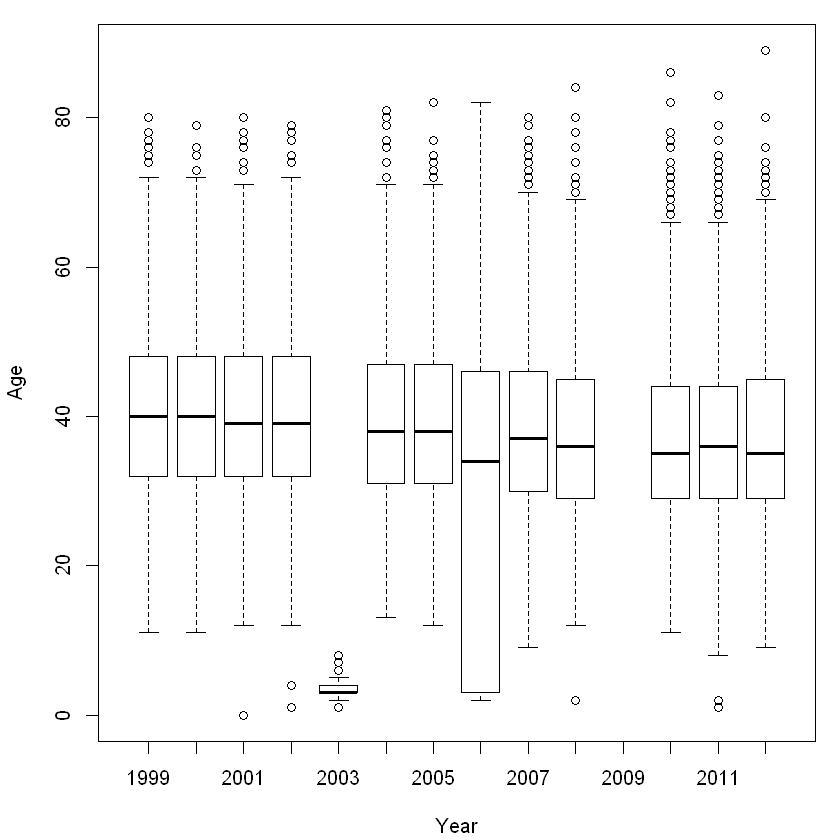

In [66]:

age = sapply(menResMat,
             function(x) as.numeric(x[ , 'ag']))


#pdf("CB_BoxplotAgeByYr.pdf", width = 8, height = 5)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

boxplot(age, ylab = "Age", xlab = "Year")

par(oldPar)
#dev.off()

In [67]:

head(menFiles[['2003']])

menFiles[['2006']][2200:2205]

[1] ""                                                                                             
[2] "Place Div /Tot  Num    Name                          Ag Hometown            Gun Tim  Net Tim "
[3] "===== ========= ===== ============================= == =================== =======  ======= " 
[4] "    1    1/1999     6  John Korir                    27  KEN                  46:56#   46:55 "
[5] "    2    2/1999     1  Reuben Cheruiyot              28  KEN                  47:03#   47:02 "
[6] "    3    3/1999     8  Gilbert Okari                 24  KEN                  47:07#   47:07 "

[1] " 2192 1263/2892   1475 Matt Curtis            39 Vienna          1:27:08 1:27:40   8:46   "
[2] " 2193  94/279    1437 Joe McCloskey          59 Columbia        1:27:01 1:27:40   8:46   " 
[3] " 2194 257/590    7062 Donald Hofmann         48 Princeton Junct 1:25:45 1:27:41   8:47   " 
[4] " 2195 1264/2892   7049 Claudio Petruzziello   23 Princeton Jct   1:25:45 1:27:41   8:47   "
[5] " 2196 339/746    3319 Robert Morrison        40 South Boston    1:23:54 1:27:41   8:47   " 
[6] " 2197 1265/2892   9345 Larry Cooper           32 Arlington       1:26:42 1:27:41   8:47   "

In [68]:

selectCols = function(shortColNames, headerRow, searchLocs) {
  sapply(shortColNames, function(shortName, headerRow, searchLocs){
    startPos = regexpr(shortName, headerRow)[[1]]
    if (startPos == -1) return( c(NA, NA) )
    index = sum(startPos >= searchLocs)
    c(searchLocs[index] + 1, searchLocs[index + 1])
  }, headerRow = headerRow, searchLocs = searchLocs )
}

Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"

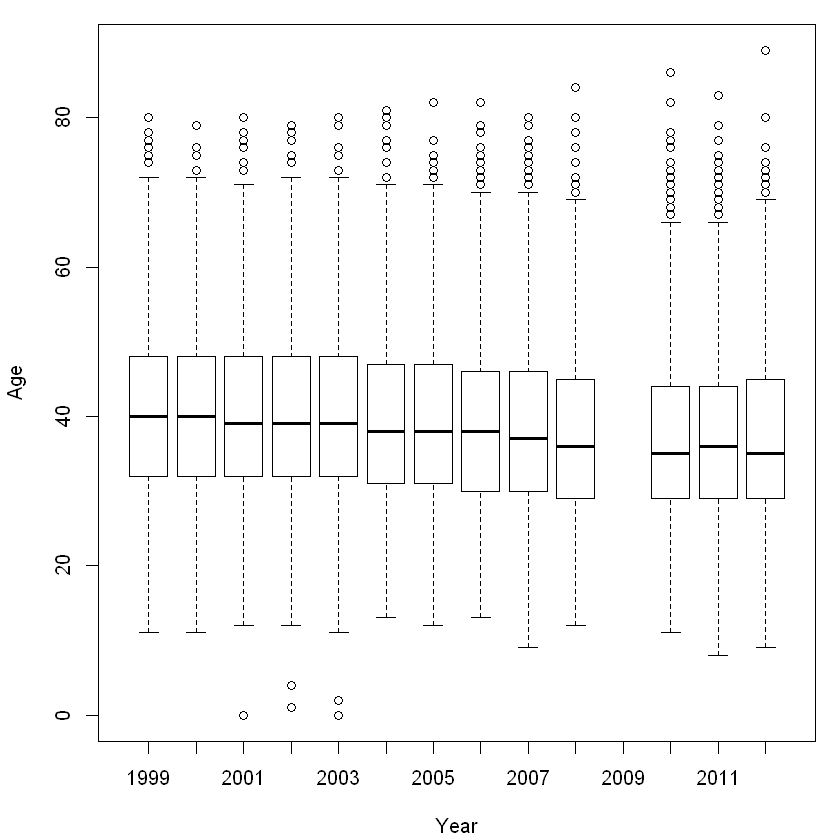

In [69]:

menResMat = lapply(menFiles, extractVariables)
#womenResMat = lapply(womenFiles, extractVariables)

age = sapply(menResMat, 
             function(x) as.numeric(x[ , 'ag']))

#pdf("CB_BoxplotAgeByYrRevised.pdf", width = 8, height = 5)
oldPar = par(mar = c(4.1, 4.1, 1, 1))
boxplot(age, ylab = "Age", xlab = "Year")
par(oldPar)
#dev.off()


In [70]:

sapply(age,  function(x) sum(is.na(x)))

age2001 = age[["2001"]]

grep("^===", menFiles[['2001']])

badAgeIndex = which(is.na(age2001)) + 5
menFiles[['2001']][ badAgeIndex ]
 
badAgeIndex

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   1    1   61    3    2    0   13    2    5    0 6651    6    0    1

[1] 5

[1] "             "                                                    
 [2] "                              "                                   
 [3] "                      "                                           
 [4] ""                                                                 
 [5] "                         "                                        
 [6] ""                                                                 
 [7] ""                                                                 
 [8] ""                                                                 
 [9] "             "                                                    
[10] "                              "                                   
[11] "                      "                                           
[12] ""                                                                 
[13] "                         "                                        
[14] ""                                                                 
[15] ""                                                                 
[16] ""                                                                 
[17] "             "                                                    
[18] "                              "                                   
[19] "                      "                                           
[20] ""                                                                 
[21] "                         "                                        
[22] ""                                                                 
[23] ""                                                                 
[24] ""                                                                 
[25] ""                                                                 
[26] "    "                                                             
[27] "         "                                                        
[28] ""                                                                 
[29] "            "                                                     
[30] ""                                                                 
[31] ""                                                                 
[32] ""                                                                 
[33] ""                                                                 
[34] "             "                                                    
[35] "                              "                                   
[36] "                      "                                           
[37] ""                                                                 
[38] "                         "                                        
[39] ""                                                                 
[40] ""                                                                 
[41] ""                                                                 
[42] "             "                                                    
[43] "                              "                                   
[44] "                      "                                           
[45] ""                                                                 
[46] "                         "                                        
[47] ""                                                                 
[48] ""                                                                 
[49] ""                                                                 
[50] ""                                                                 
[51] ""                                                                 
[52] ""                                                                 
[53] "             "                                                    
[54] "                              "                                   
[55] "                      "                              

[1] 1756 1757 1758 1759 1760 1761 1762 1763 1814 1815 1816 1817 1818 1819 1820
[16] 1821 1872 1873 1874 1875 1876 1877 1878 1879 1930 1931 1932 1933 1934 1935
[31] 1936 1937 2538 2539 2540 2541 2542 2543 2544 2545 2546 2897 2898 2899 2900
[46] 2901 2902 2903 2904 2955 2956 2957 3008 3009 3010 3011 3012 3013 3014 3015
[61] 3627

In [71]:

extractVariables = 
function(file, varNames =c("name", "home", "ag", "gun",
                           "net", "time"))
{
  
  # Find the index of the row with =s
  eqIndex = grep("^===", file)
  # Extract the two key rows and the data 
  spacerRow = file[eqIndex] 
  headerRow = tolower(file[ eqIndex - 1 ])
  body = file[ -(1 : eqIndex) ]
       # Remove footnotes and blank rows
  footnotes = grep("^[[:blank:]]*(\\*|\\#)", body)
  if ( length(footnotes) > 0 ) body = body[ -footnotes ]
  blanks = grep("^[[:blank:]]*$", body)
  if (length(blanks) > 0 ) body = body[ -blanks ]
  
  
  # Obtain the starting and ending positions of variables   
  searchLocs = findColLocs(spacerRow)
  locCols = selectCols(varNames, headerRow, searchLocs)
  
  Values = mapply(substr, list(body), start = locCols[1, ], 
                  stop = locCols[2, ])
  colnames(Values) = varNames
  
  return(Values)
}

In [72]:

menResMat = lapply(menFiles, extractVariables)
#womenResMat = lapply(womenFiles, extractVariables)

which(age2001 < 5)

menFiles[['2001']][ which(age2001 < 5) + 5 ]

charTime = menResMat[['2012']][, 'time']
head(charTime, 5)

tail(charTime, 5)

timePieces = strsplit(charTime, ":")

timePieces[[1]]

tail(timePieces, 1)

timePieces = sapply(timePieces, as.numeric)

runTime = sapply(timePieces, 
                 function(x) {
                   if (length(x) == 2) x[1] + x[2]/60
                   else 60*x[1] + x[2] + x[3]/60
                 })

summary(runTime)


[1] 1377 3063 3112

[1] " 1377  5629 Steve PINKOS           0 Washington DC      1:20:07 1:22:34"
[2] " 3003  5033 Jeff LAKE              0 Clarksville MD     1:39:26 1:41:22"
[3] " 3052  5637 Greg RHODE             0 Washington DC      1:37:14 1:42:13"

[1] "  45:15 " "  46:28 " "  47:33 " "  47:34 " "  47:40 "

[1] "2:27:11 " "2:27:20 " "2:27:30 " "2:28:58 " "2:30:59 "

[1] "  45" "15 "

[[1]]
[1] "2"   "30"  "59 "

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  45.25   77.57   87.47   88.43   97.78  150.98 

In [73]:

convertTime = function(time) {
  timePieces = strsplit(time, ":")
  timePieces = sapply(timePieces, as.numeric)
  sapply(timePieces, function(x) {
                      if (length(x) == 2) x[1] + x[2]/60
                      else 60*x[1] + x[2] + x[3]/60
                      })
}

createDF = 
function(Res, year, sex) 
{
       # Determine which time to use
  useTime = if( !is.na(Res[1, 'net']) )  
              Res[ , 'net']
            else if( !is.na(Res[1, 'gun']) ) 
               Res[ , 'gun']
            else 
               Res[ , 'time']

  runTime = convertTime(useTime)
  
  Results = data.frame(year = rep(year, nrow(Res)),
                       sex = rep(sex, nrow(Res)),
                       name = Res[ , 'name'],
                       home = Res[ , 'home'],
                       age = as.numeric(Res[, 'ag']), 
                       runTime = runTime,
                       stringsAsFactors = FALSE)
  invisible(Results)
}

In [74]:

menDF = mapply(createDF, menResMat, year = 1999:2012,
               sex = rep("M", 14), SIMPLIFY = FALSE)

warnings()[ c(1:2, 49:50) ]

sapply(menDF, function(x) sum(is.na(x$runTime)))

Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduce

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

NULL

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    0    0    0    0    0 5232   83    0 6649   68    0    0

In [75]:

createDF = function(Res, year, sex) 
{
  # Determine which time to use
  if ( !is.na(Res[1, 'net']) ) useTime = Res[ , 'net']
  else if ( !is.na(Res[1, 'gun']) ) useTime = Res[ , 'gun']
  else useTime = Res[ , 'time']
  
  # Remove # and * and blanks from time
  useTime = gsub("[#\\*[:blank:]]", "", useTime)
  runTime = convertTime(useTime[ useTime != "" ])
  
  # Drop rows with no time
  Res = Res[ useTime != "", ]
  
  Results = data.frame(year = rep(year, nrow(Res)),
                       sex = rep(sex, nrow(Res)),
                       name = Res[ , 'name'], home = Res[ , 'home'],
                       age = as.numeric(Res[, 'ag']), 
                       runTime = runTime,
                       stringsAsFactors = FALSE)
  invisible(Results)
}


In [76]:

menDF = mapply(createDF, menResMat, year = 1999:2012,
               sex = rep("M", 14), SIMPLIFY = FALSE)

sapply(menDF, function(x) sum(is.na(x$runTime)))

separatorIdx = grep("^===", menFiles[["2006"]])
separatorRow = menFiles[['2006']][separatorIdx]
separatorRowX = paste(substring(separatorRow, 1, 63), " ", 
                      substring(separatorRow, 65, nchar(separatorRow)), 
                      sep = "")
menFiles[['2006']][separatorIdx] = separatorRowX

menResMat = sapply(menFiles, extractVariables)
menDF = mapply(createDF, menResMat, year = 1999:2012,
               sex = rep("M", 14), SIMPLIFY = FALSE)

Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduce

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    0    0    0    0    0 5232    0    0 6649    0    0    0

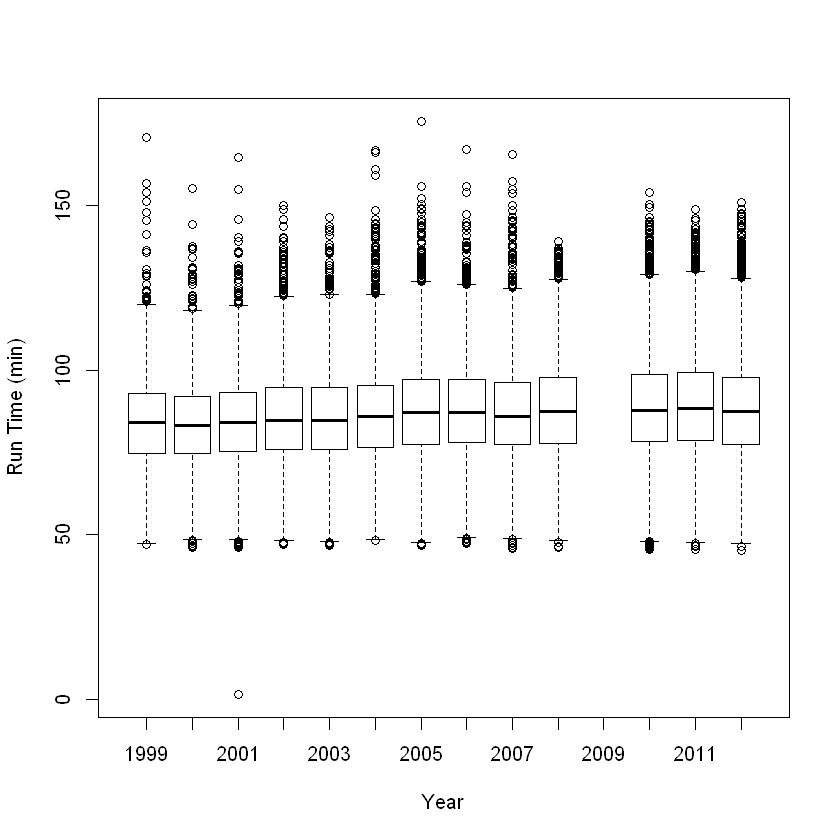

In [78]:

#pdf("CB_BoxplotTimeByYr.pdf", width = 8, height = 5)
boxplot(sapply(menDF, function(x) x$runTime), 
        xlab = "Year", ylab = "Run Time (min)")
#dev.off()


In [82]:

cbMen = do.call(rbind, menDF)
save(cbMen, file = "cbMen.rda")

dim(cbMen)

[1] 70070     6

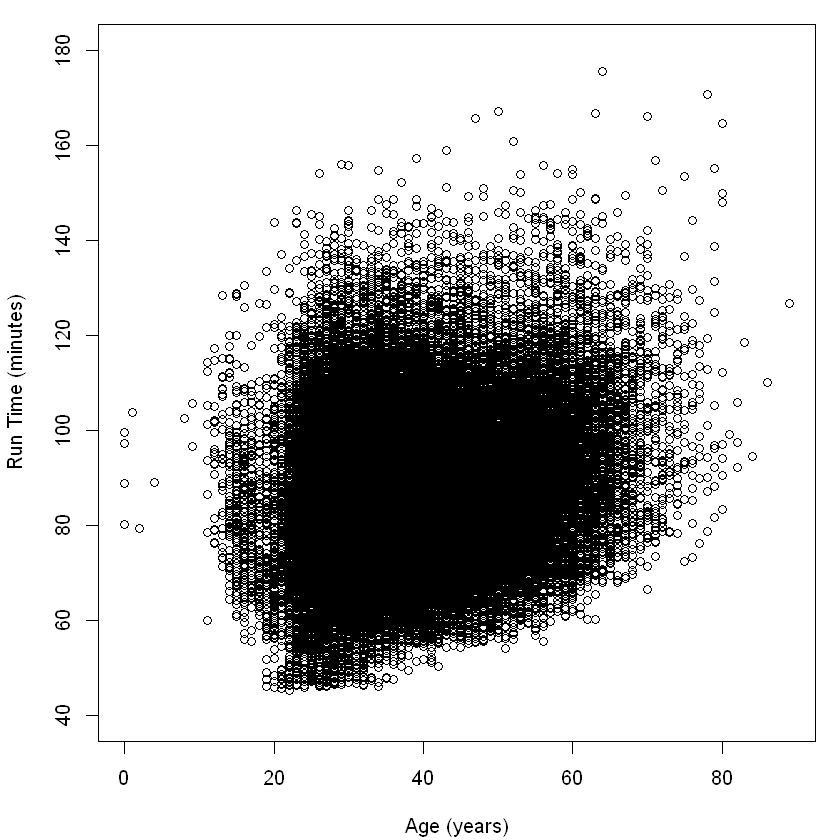

In [83]:

load("cbMen.rda")

#pdf("CB_Overplot.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(runTime ~ age, data = cbMen, ylim = c(40, 180),
     xlab = "Age (years)", ylab = "Run Time (minutes)")

par(oldPar)
#dev.off()

[1] "brewer.pal"         "brewer.pal.info"    "display.brewer.all"
[4] "display.brewer.pal"

[1] "#54278F"

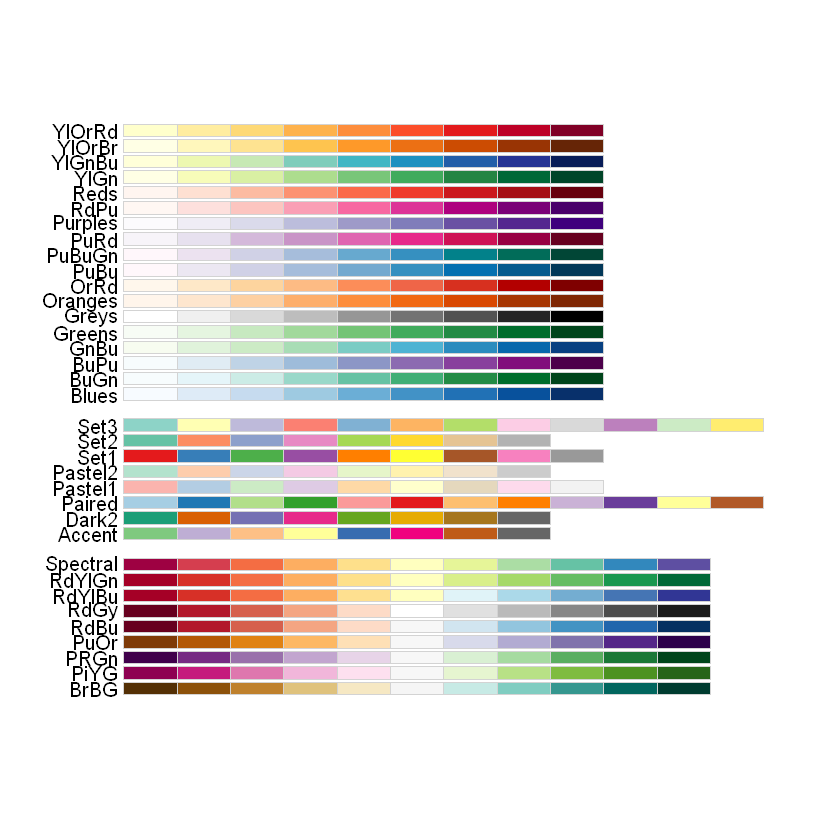

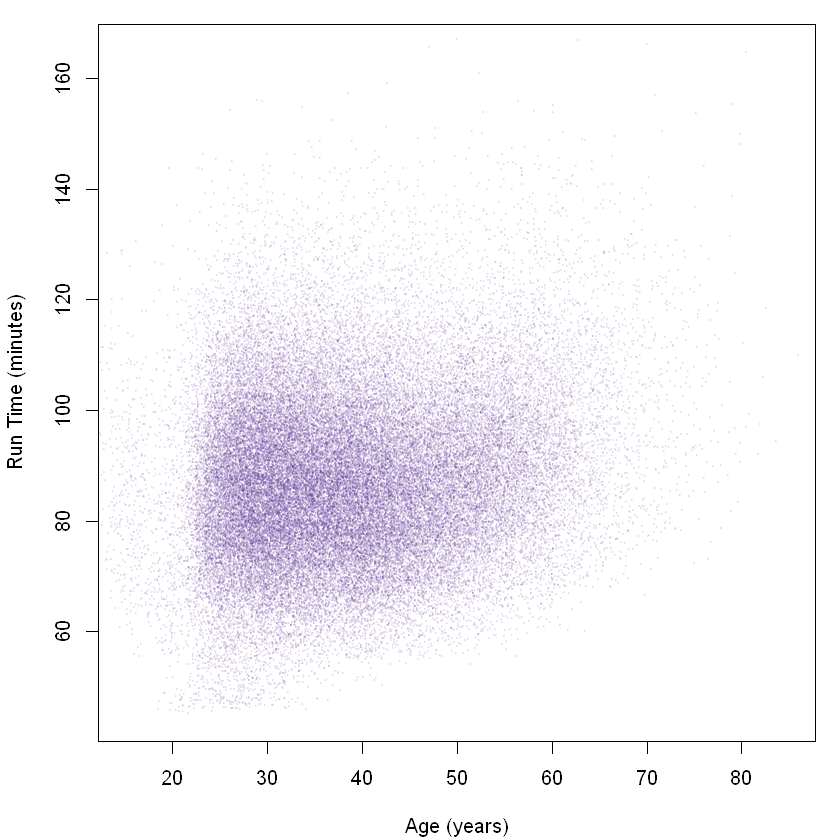

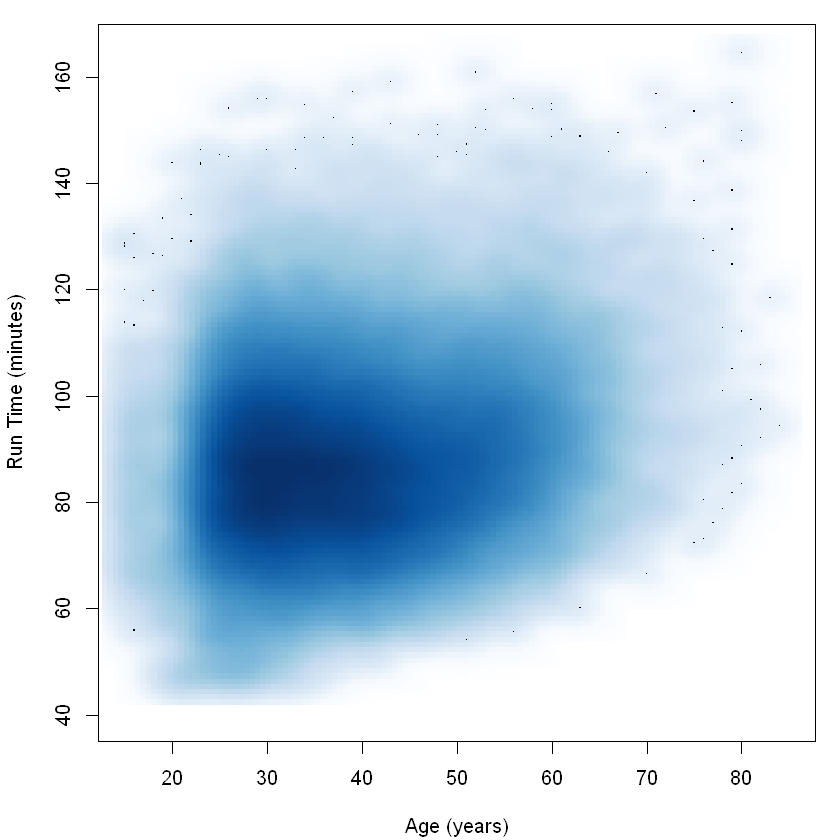

In [85]:

library(RColorBrewer)
ls("package:RColorBrewer")

display.brewer.all()

Purples8 = brewer.pal(9, "Purples")[8]
Purples8

Purples8A = paste(Purples8, "14", sep = "")

#pdf("CB_OverplotTransparent.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))
plot(runTime ~ jitter(age, amount = 0.5), 
     data = cbMen, 
     pch = 19,cex = 0.2, col = Purples8A,
     ylim = c(45, 165), xlim = c(15, 85),
     xlab = "Age (years)", ylab = "Run Time (minutes)")
par(oldPar)
#dev.off()

#pdf("CB_SmoothScatter.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

smoothScatter(y = cbMen$runTime, x = cbMen$age,
              ylim = c(40, 165), xlim = c(15, 85),
              xlab = "Age (years)", ylab = "Run Time (minutes)")

par(oldPar)
#dev.off()

ageCat
(15,25] (25,35] (35,45] (45,55] (55,65] (65,75] (75,90] 
   5154   22772   18687   11216    4607     679      64 

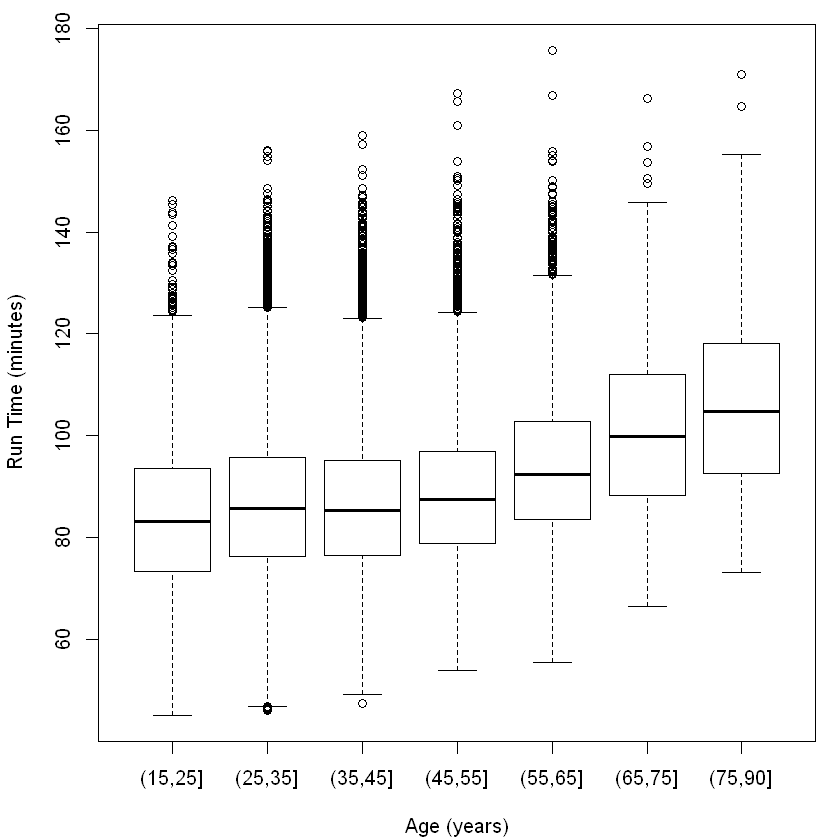

In [86]:

cbMenSub = cbMen[cbMen$runTime > 30 &
                 !is.na(cbMen$age) & cbMen$age > 15, ]

ageCat = cut(cbMenSub$age, breaks = c(seq(15, 75, 10), 90))
table(ageCat)

#pdf("CB_Boxplots.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(cbMenSub$runTime ~ ageCat, 
     xlab = "Age (years)", ylab = "Run Time (minutes)")

par(oldPar)
#dev.off()

(Intercept)         age 
 78.5886239   0.2259324


Call:
lm(formula = runTime ~ age, data = cbMenSub)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.187 -10.209  -0.954   9.075  82.552 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 78.588624   0.218726  359.30   <2e-16 ***
age          0.225932   0.005427   41.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.75 on 63177 degrees of freedom
Multiple R-squared:  0.0267,	Adjusted R-squared:  0.02668 
F-statistic:  1733 on 1 and 63177 DF,  p-value: < 2.2e-16


[1] "lm"

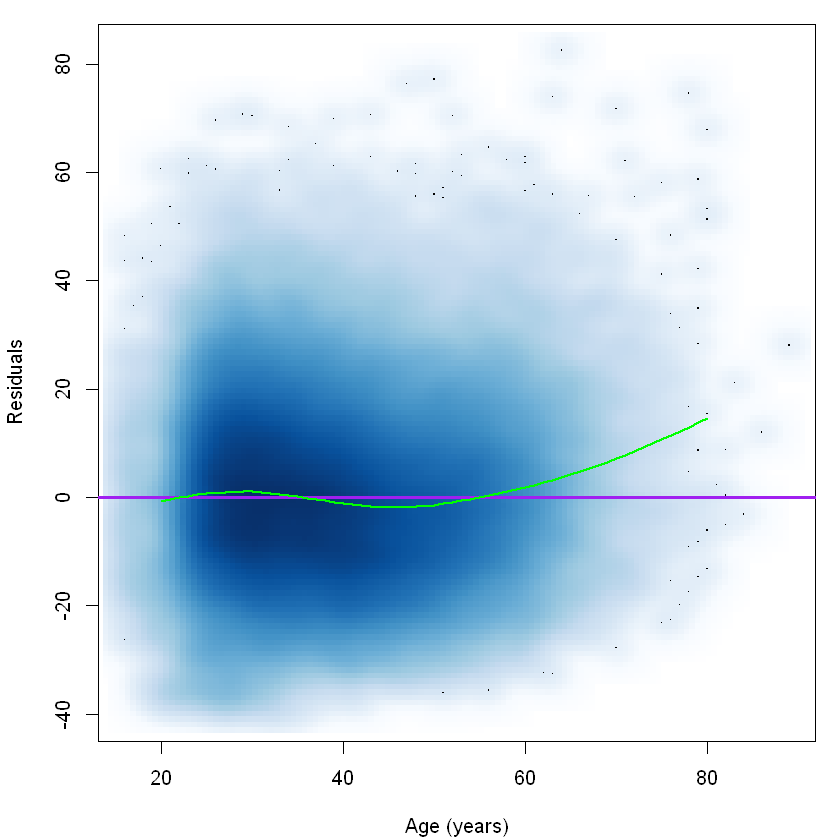

In [87]:

lmAge = lm(runTime ~ age, data = cbMenSub)

lmAge$coefficients

summary(lmAge)

class(lmAge)

#pdf("CB_ResidSimpleLM.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

smoothScatter(x = cbMenSub$age, y = lmAge$residuals,
              xlab = "Age (years)", ylab = "Residuals")
abline(h = 0, col = "purple", lwd = 3)
 
resid.lo = loess(resids ~ age, 
                 data = data.frame(resids = residuals(lmAge),
                                   age = cbMenSub$age))

age20to80 = 20:80

resid.lo.pr = 
  predict(resid.lo, newdata = data.frame(age = age20to80))

lines(x = age20to80, y = resid.lo.pr, col = "green", lwd = 2)
par(oldPar)
#dev.off()

In [88]:

menRes.lo = loess(runTime ~ age, cbMenSub)

menRes.lo.pr = predict(menRes.lo, data.frame(age = age20to80))

over50 = pmax(0, cbMenSub$age - 50)

lmOver50 = lm(runTime ~ age + over50, data = cbMenSub)

summary(lmOver50)

decades = seq(30, 60, by = 10)
overAge = lapply(decades, 
                 function(x) pmax(0, (cbMenSub$age - x)))
names(overAge) = paste("over", decades, sep = "")
overAge = as.data.frame(overAge)
tail(overAge)

lmPiecewise = lm(runTime ~ . , 
                 data = cbind(cbMenSub[, c("runTime", "age")], 
                              overAge))

summary(lmPiecewise)


Call:
lm(formula = runTime ~ age + over50, data = cbMenSub)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.129 -10.090  -0.886   9.033  79.211 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 82.683238   0.279324  296.01   <2e-16 ***
age          0.103788   0.007512   13.82   <2e-16 ***
over50       0.572542   0.024457   23.41   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.69 on 63176 degrees of freedom
Multiple R-squared:  0.03507,	Adjusted R-squared:  0.03504 
F-statistic:  1148 on 2 and 63176 DF,  p-value: < 2.2e-16


over30 over40 over50 over60
63174 36     26     16     6     
63175 11      1      0     0     
63176  9      0      0     0     
63177 26     16      6     0     
63178  5      0      0     0     
63179 18      8      0     0


Call:
lm(formula = runTime ~ ., data = cbind(cbMenSub[, c("runTime", 
    "age")], overAge))

Residuals:
    Min      1Q  Median      3Q     Max 
-40.522 -10.102  -0.906   9.018  79.070 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 74.33159    0.96573  76.969  < 2e-16 ***
age          0.41619    0.03502  11.884  < 2e-16 ***
over30      -0.47210    0.05031  -9.384  < 2e-16 ***
over40       0.23142    0.04259   5.434 5.53e-08 ***
over50       0.47961    0.05518   8.693  < 2e-16 ***
over60       0.03178    0.08097   0.392    0.695    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.68 on 63173 degrees of freedom
Multiple R-squared:  0.03642,	Adjusted R-squared:  0.03634 
F-statistic: 477.5 on 5 and 63173 DF,  p-value: < 2.2e-16


In [89]:

overAge20 = lapply(decades, function(x) pmax(0, (age20to80 - x)))
names(overAge20) = paste("over", decades, sep = "")
overAgeDF = cbind(age = data.frame(age = age20to80), overAge20)

tail(overAgeDF)

age over30 over40 over50 over60
56 75  45     35     25     15    
57 76  46     36     26     16    
58 77  47     37     27     17    
59 78  48     38     28     18    
60 79  49     39     29     19    
61 80  50     40     30     20

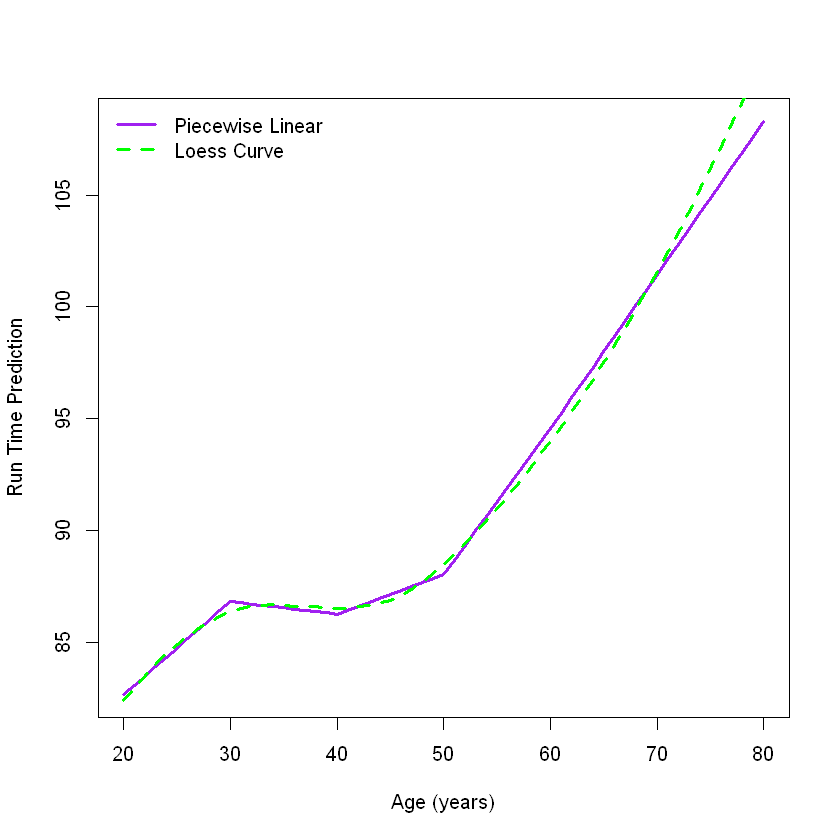

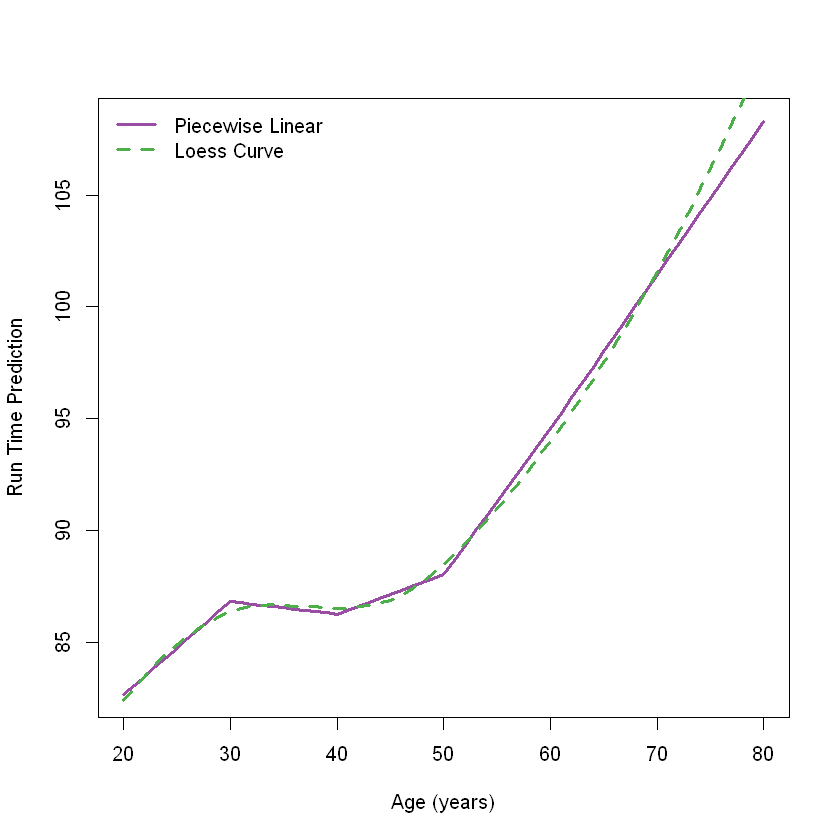

In [90]:

predPiecewise = predict(lmPiecewise, overAgeDF)

plot(predPiecewise ~ age20to80,
     type = "l", col = "purple", lwd = 3,
     xlab = "Age (years)", ylab = "Run Time Prediction")

lines(x = age20to80, y = menRes.lo.pr, 
      col = "green", lty = 2, lwd = 3)
legend("topleft", col = c("purple", "green"),
       lty = c(1, 2), lwd= 3,
       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")

#pdf("CB_PiecewiseLoessCurves.pdf", width = 8, height = 6)
plot(predPiecewise ~ age20to80,
     type = "l", col = "#984ea3", lwd = 3,
  #   type = "l", col = "purple", lwd = 2,
     xlab = "Age (years)", ylab = "Run Time Prediction")

lines(x = age20to80, y = menRes.lo.pr, col = "#4daf4a", lwd = 3, lty = 2)
legend("topleft", col = c("#984ea3", "#4daf4a"), lty = c(1, 2), lwd = 3,
       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")

#lines(x = age20to80, y = menRes.lo.pr, col = "green", lwd = 2)
#legend("topleft", col = c("purple", "green"), lty = 1, lwd = 2,
#       legend = c("Piecewise Linear", "Loess Curve"), bty = "n")
#dev.off()


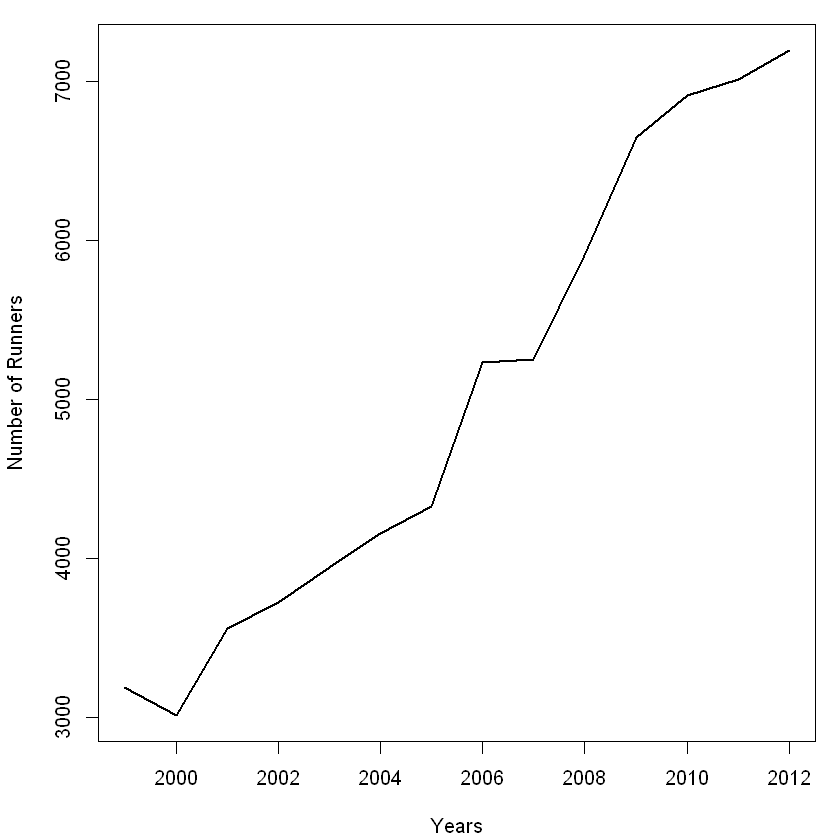

In [91]:

#pdf("CB_NumRunnersLinePlot.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

numRunners = with(cbMen, tapply(runTime, year, length))
plot(numRunners ~ names(numRunners), type="l", lwd = 2,
     xlab = "Years", ylab = "Number of Runners")
par(oldPar)
#dev.off()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  46.98   74.82   84.29   84.35   93.06  170.83 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  45.25   77.57   87.47   88.44   97.78  150.98 

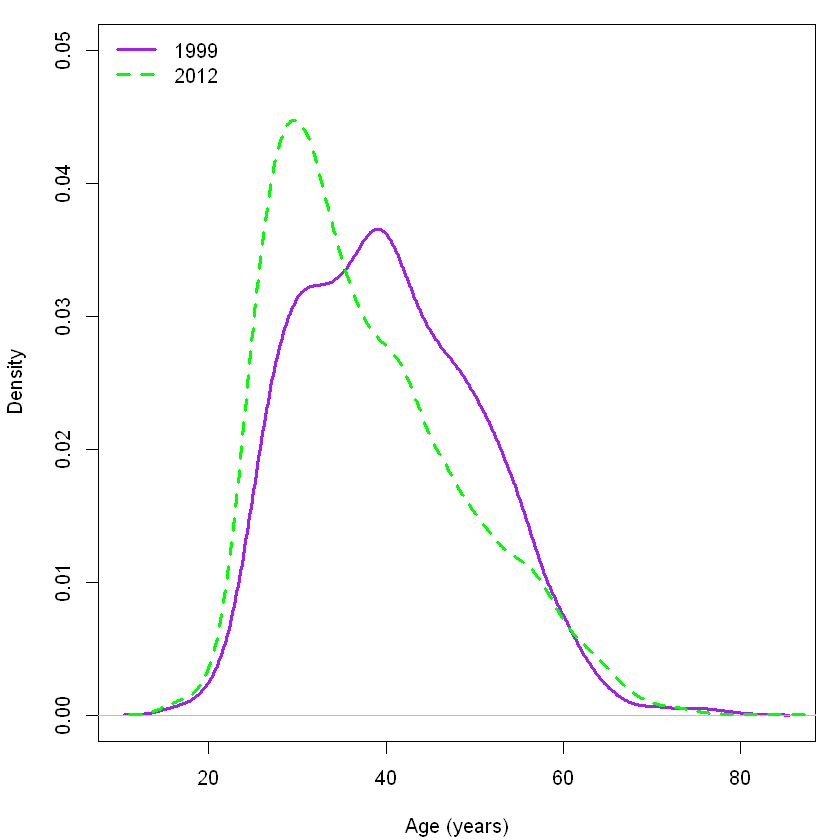

In [92]:

summary(cbMenSub$runTime[cbMenSub$year == 1999])

summary(cbMenSub$runTime[cbMenSub$year == 2012])

#pdf("CB_AgeDensity99vs12.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

age1999 = cbMenSub[ cbMenSub$year == 1999, "age" ]
age2012 = cbMenSub[ cbMenSub$year == 2012, "age" ]

plot(density(age1999, na.rm = TRUE), 
     ylim = c(0, 0.05), col = "purple",
     lwd = 3,  xlab = "Age (years)",  main = "")
lines(density(age2012, na.rm = TRUE), 
      lwd = 3, lty = 2, col="green")
legend("topleft", col = c("purple", "green"), lty= 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")

par(oldPar)
#dev.off()

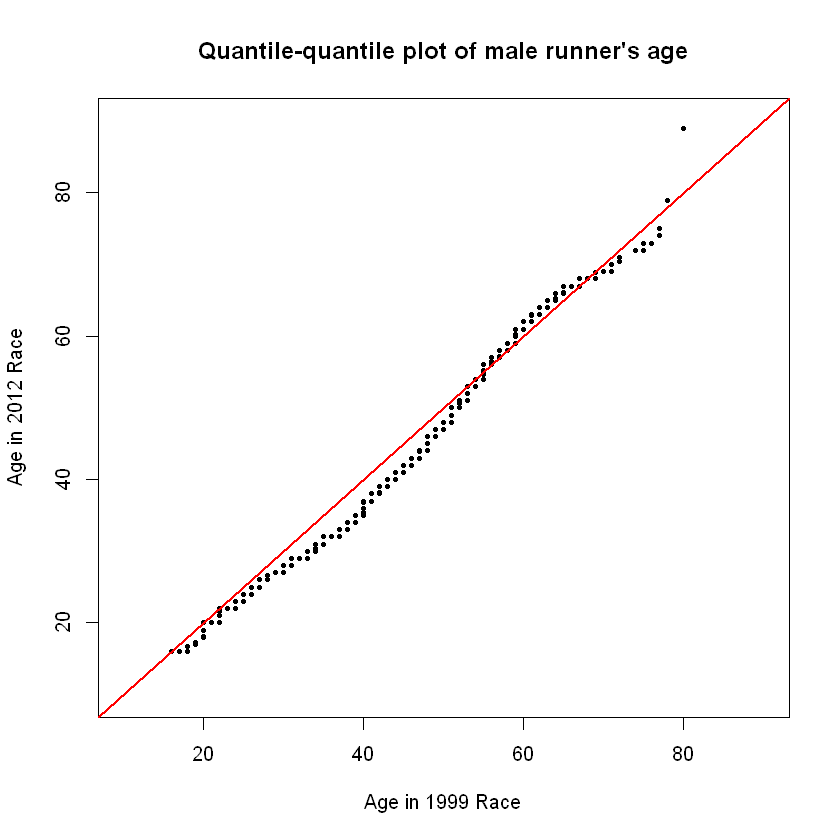

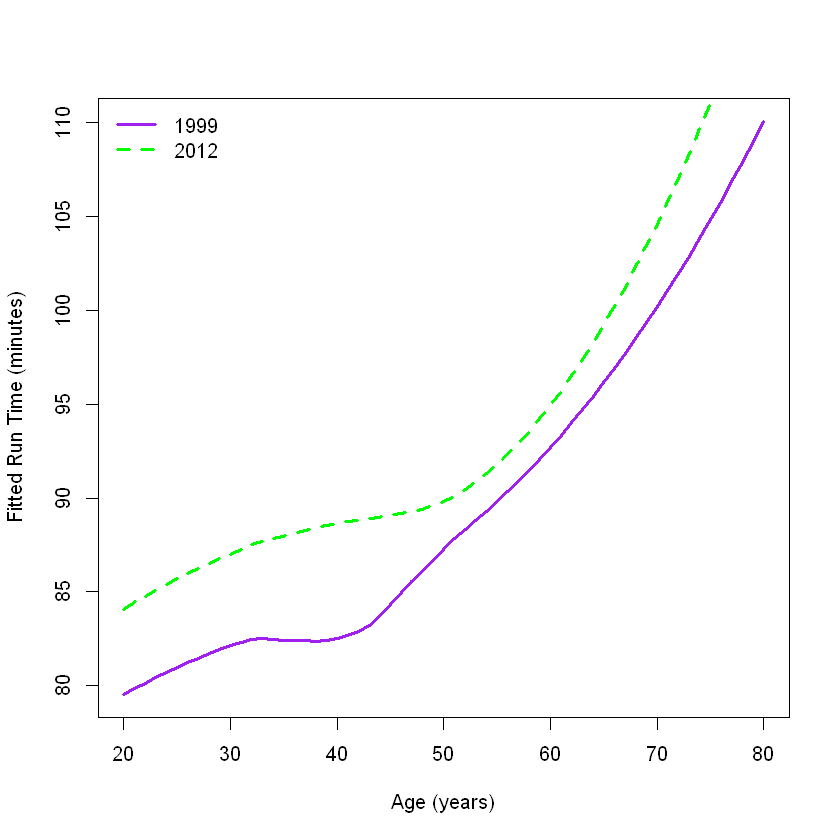

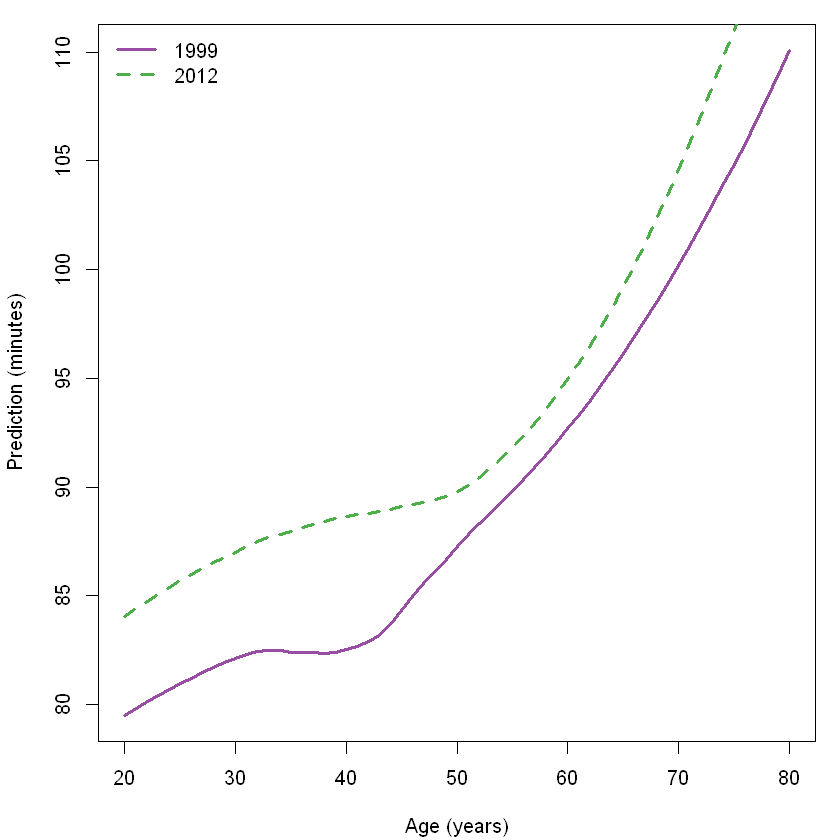

In [93]:

qqplot(age1999, age2012, pch = 19, cex = 0.5, 
       ylim = c(10,90), xlim = c(10,90), 
       xlab = "Age in 1999 Race",
       ylab = "Age in 2012 Race", 
       main = "Quantile-quantile plot of male runner's age")
abline(a =0, b = 1, col="red", lwd = 2)

mR.lo99 = loess(runTime ~ age, cbMenSub[ cbMenSub$year == 1999,])
mR.lo.pr99 = predict(mR.lo99, data.frame(age = age20to80))

mR.lo12 = loess(runTime ~ age, cbMenSub[ cbMenSub$year == 2012,])
mR.lo.pr12 = predict(mR.lo12, data.frame(age = age20to80))

plot(mR.lo.pr99 ~ age20to80,
     type = "l", col = "purple", lwd = 3,
     xlab = "Age (years)", ylab = "Fitted Run Time (minutes)")
   
lines(x = age20to80, y = mR.lo.pr12,
      col = "green", lty = 2, lwd = 3)
 
legend("topleft", col = c("purple", "green"), lty = 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")


#pdf("CB_Loess99vs12.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(mR.lo.pr99 ~ age20to80,
     type = "l", col = "#984ea3", lwd = 3,
     xlab = "Age (years)", ylab = "Prediction (minutes)")  
lines(x = age20to80, y = mR.lo.pr12, col="#4daf4a", lty = 2, lwd = 3) 
legend("topleft", col = c("#984ea3", "#4daf4a"), lty = 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")
par(oldPar)
#dev.off()

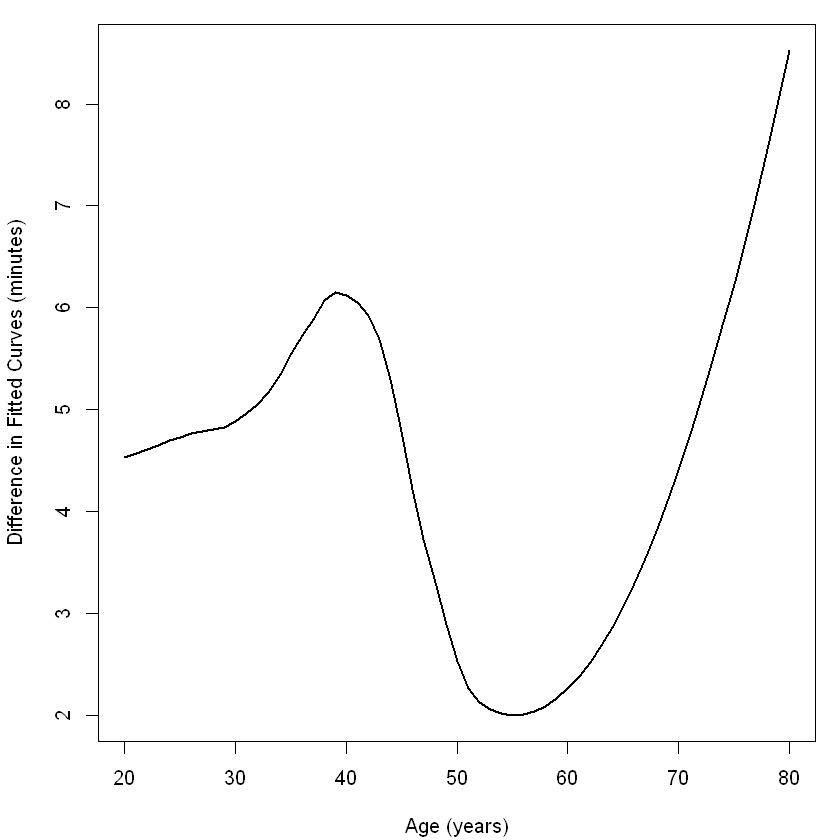

In [94]:

gap14 = mR.lo.pr12 - mR.lo.pr99

#pdf("CB_DifferenceInFittedCurves.pdf", width = 8, height = 6)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(gap14 ~ age20to80, type = "l" , xlab = "Age (years)", 
     ylab = "Difference in Fitted Curves (minutes)", lwd = 2)
par(oldPar)
#dev.off()

In [95]:

fastestMan = tapply(menRes$time, menRes$age, min, na.rm = TRUE)
plot(fastestMan ~ names(fastestMan), type ="l", xlim = c(20, 80))
ageFM = as.numeric(names(fastestMan))
mR.loF = loess(fastestMan ~ ageFM)
mR.lo.prF = predict(mR.loF, data.frame(age = ageFM), se = FALSE)
lines(x = ageFM, y = mR.lo.prF, col = "purple", lwd = 2)

timeNorm = menRes$time / mR.lo.prF[as.character(menRes$age)]
time99Norm = timeNorm[menRes$year == 1999]
time12Norm = timeNorm[menRes$year == 2012]
summary(time99Norm)

summary(time12Norm)

ERROR: Error in tapply(menRes$time, menRes$age, min, na.rm = TRUE): object 'menRes' not found


In [97]:
head(menResMat)

$`1999`
        name                     home                  ag    gun net time      
   [1,] "Worku Bikila          " "Ethiopia           " "28 " NA  NA  "  46:59 "
   [2,] "Lazarus Nyakeraka     " "Kenya              " "24 " NA  NA  "  47:01 "
   [3,] "James Kariuki         " "Kenya              " "27 " NA  NA  "  47:03 "
   [4,] "William Kiptum        " "Kenya              " "28 " NA  NA  "  47:07 "
   [5,] "Joseph Kimani         " "Kenya              " "26 " NA  NA  "  47:31 "
   [6,] "Josphat Machuka       " "Kenya              " "25 " NA  NA  "  47:33 "
   [7,] "Julius Randich        " "Kenya              " "26 " NA  NA  "  47:37 "
   [8,] "Leonid Shvetsov       " "Russia             " "30 " NA  NA  "  49:10 "
   [9,] "Reuben Chesang        " "Kenya              " "38 " NA  NA  "  49:22 "
  [10,] "Daniel Kihara         " "Kenya              " "30 " NA  NA  "  49:23 "
  [11,] "Kibet Cherop          " "Kenya              " "24 " NA  NA  "  49:26 "
  [12,] "Ben Kimondieu         " "Kenya              " "21 " NA  NA  "  49:37 "
  [13,] "Jacob Kirua           " "Kenya              " "23 " NA  NA  "  50:05 "
  [14,] "Simon Cherogony       " "Kenya              " "27 " NA  NA  "  50:17 "
  [15,] "Eric Morrison         " "Lakewood CO        " "28 " NA  NA  "  50:35 "
  [16,] "Mark Gilmore          " "Columbia MD        " "31 " NA  NA  "  50:40 "
  [17,] "Phillippe Rolly       " "France             " "26 " NA  NA  "  51:00 "
  [18,] "Jason Bodnar          " "Davie FL           " "28 " NA  NA  "  51:15 "
  [19,] "Bernard Kitur         " "Aurora CO          " "27 " NA  NA  "  51:17 "
  [20,] "Todd Reeser           " "Canandaigua NY     " "25 " NA  NA  "  51:42 "
  [21,] "Chris Chattin         " "Columbia MD        " "35 " NA  NA  "  52:22 "
  [22,] "Andrew Klemas         " "Falls Church VA    " "35 " NA  NA  "  52:25 "
  [23,] "Gerry Clapper         " "Columbia MD        " "37 " NA  NA  "  52:27 "
  [24,] "Dave Berardi          " "Baltimore MD       " "38 " NA  NA  "  52:29 "
  [25,] "Gary O'donnell        " "Arlington VA       " "26 " NA  NA  "  52:32 "
  [26,] "Rob Magin             " "Gaithersburg MD    " "28 " NA  NA  "  52:40 "
  [27,] "Luis Del Aguila       " "State College PA   " "29 " NA  NA  "  52:57 "
  [28,] "Robert Walker         " "Silver Spring MD   " "31 " NA  NA  "  53:24 "
  [29,] "Bill Rodgers          " "Sherborn MA        " "51 " NA  NA  "  54:03 "
  [30,] "Mark Hoon             " "Kensington MD      " "34 " NA  NA  "  54:13 "
  [31,] "Daniel Wallace        " "Arlington VA       " "33 " NA  NA  "  54:16 "
  [32,] "Charlie Andrews       " "Rochester NY       " "41 " NA  NA  "  54:18 "
  [33,] "Jon Sushinsky         " "Bethesda MD        " "25 " NA  NA  "  54:28 "
  [34,] "Anthony Basile        " "Columbia MD        " "40 " NA  NA  "  54:28 "
  [35,] "Mark Thompson         " "Alexandria VA      " "30 " NA  NA  "  54:30 "
  [36,] "Patrick Reed          " "Annapolis MD       " "29 " NA  NA  "  54:43 "
  [37,] "Anthony Belber        " "Washington DC      " "26 " NA  NA  "  54:55 "
  [38,] "Todd Martin           " "Arlington VA       " "29 " NA  NA  "  54:55 "
  [39,] "David Mead            " "Bethesda MD        " "30 " NA  NA  "  54:57 "
  [40,] "Patrick Schooley      " "Arlington VA       " "28 " NA  NA  "  54:59 "
  [41,] "Chuck Moeser          " "Sterling VA        " "47 " NA  NA  "  55:11 "
  [42,] "Matt Boyd             " "Fredericksburg VA  " "28 " NA  NA  "  55:17 "
  [43,] "Mike Wardian          " "Mclean VA          " "24 " NA  NA  "  55:27 "
  [44,] "Trey Cassidy          " "Silver Spring MD   " "30 " NA  NA  "  55:30 "
  [45,] "Daniel Holland        " "Philadelphia PA    " "29 " NA  NA  "  55:40 "
  [46,] "Philippe Kozub        " "Bethesda MD        " "23 " NA  NA  "  55:40 "
  [47,] "James Pryde, Jr.      " "Churchville MD     " "45 " NA  NA  "  55:49 "
  [48,] "George Altieri        " "Columbia MD        " "41 " NA  NA  "  55:50 "
  [49,] "Peter Kirk            " "Rockville MD       " "42 " NA  NA  "  